In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from tqdm import tqdm
import json
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /home/arash/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/arash/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/arash/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
df = pd.read_csv('data/Suicide_Detection.csv')

df = df[["text", "class"]]

df

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...
232069,If you don't like rock then your not going to ...,non-suicide
232070,You how you can tell i have so many friends an...,non-suicide
232071,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,The usual stuff you find hereI'm not posting t...,suicide


Number of 'suicide' tags: 116037
Number of 'non-suicide' tags: 116037


<Axes: ylabel='count'>

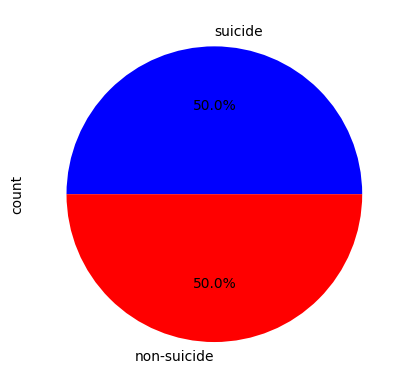

In [14]:
suicide_count = df[df['class'] == "suicide"].shape[0]
non_suicide_count = df[df['class'] == "non-suicide"].shape[0]

print(f"Number of 'suicide' tags: {suicide_count}")
print(f"Number of 'non-suicide' tags: {non_suicide_count}")

df['class'].value_counts().plot.pie(autopct='%1.1f%%', labels=['suicide', 'non-suicide'], colors=['blue', 'red'])

In [15]:
df['label'] = df['class'].apply(lambda x: 1 if x == 'suicide' else 0)

In [16]:
display(f'Number of nulls in text  => {df["text"].isnull().sum()}')
display(f'Number of nulls in class => {df["class"].isnull().sum()}')

'Number of nulls in text  => 0'

'Number of nulls in class => 0'

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=0)

In [18]:
# X_train = X_train[:10000]
# y_train = y_train[:10000]
# X_test = X_test[:10000]
# y_test = y_test[:10000]

In [19]:
print(X_train.shape)

(185659,)


In [20]:
print(X_train)

72954     Long Distance relationship tips? So basically ...
103428    Beginning to give up on my girlfriendMy girlfr...
56933     Friend is suicidal. Please please help.My frie...
18662     Rapunzel isn’t my Valentine today Time to just...
8399      It’s been a long timeI’ve had a good streak fo...
                                ...                        
176963    Best idea is prob to kill myselfThinking about...
117952    I'm not in any immediate dangerBut on a scale ...
173685    Questioning morality I guess that title's pret...
43567     Life is awesome, but despite best efforts, i'm...
199340    Yea sex is cool but Have you ever tamed a wolf...
Name: text, Length: 185659, dtype: object


In [21]:
n_train, n_test = X_train.shape[0], X_test.shape[0]

X_train_token = dict()
for x, line in tqdm(X_train.items(), total=n_train):
    X_train_token[x] = word_tokenize(line)
    
X_test_token = dict()
for x, line in tqdm(X_test.items(), total=n_test):
    X_test_token[x] = word_tokenize(line) 

100%|██████████| 46415/46415 [00:27<00:00, 1698.31it/s]


In [22]:
lemmatizer = WordNetLemmatizer()

X_train_lemma = dict()
for x, line in tqdm(X_train_token.items(), total=n_train):
    X_train_lemma[x] = [lemmatizer.lemmatize(word) for word in line]

X_test_lemma = dict()
for x, line in tqdm(X_test_token.items(), total=n_test):
    X_test_lemma[x] = [lemmatizer.lemmatize(word) for word in line]

100%|██████████| 46415/46415 [00:16<00:00, 2804.14it/s]


In [23]:
X_train_clear = dict()
for i, (x, line) in tqdm(enumerate(X_train_lemma.items()), total=n_train):
    X_train_clear[x] = [word for word in line if word not in stopwords.words('english')]
    
X_test_clear = dict()
for i, (x, line) in tqdm(enumerate(X_test_lemma.items()), total=n_test):
    X_test_clear[x] = [word for word in line if word not in stopwords.words('english')]

100%|██████████| 46415/46415 [04:57<00:00, 156.12it/s]


In [24]:
X_train_clear_df = pd.DataFrame(X_train_clear.items(), columns=["id", "text"])
X_test_clear_df = pd.DataFrame(X_test_clear.items(), columns=["id", "text"])
X_test_clear_df["text"] = X_test_clear_df["text"].apply(json.dumps)
X_train_clear_df["text"] = X_train_clear_df["text"].apply(json.dumps)

In [25]:
X_test_clear_df.to_csv("data/test_cleared.csv")
X_train_clear_df.to_csv("data/train_cleared.csv")
y_train.to_csv("data/train_labels.csv")
y_test.to_csv("data/test_labels.csv")

# Algorithms

After preprocessing, the dataset is saved in CSV files. Here, we load the datasets and we apply the algorithms.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from tqdm import tqdm
import json
import re
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /home/arash/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/arash/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/arash/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
X_test_clear_df = pd.read_csv('data/test_cleared.csv', index_col=0)
X_test_clear_df["text"] = X_test_clear_df["text"].apply(json.loads)
y_test_df = pd.read_csv("data/test_labels.csv", index_col=0)

X_train_clear_df = pd.read_csv('data/train_cleared.csv', index_col=0)
X_train_clear_df["text"] = X_train_clear_df["text"].apply(json.loads)
y_train_df = pd.read_csv("data/train_labels.csv", index_col=0)

In [3]:
X_train_clear = [line for line in X_train_clear_df["text"]]
X_test_clear = [line for line in X_test_clear_df["text"]]
y_train = y_train_df["label"].tolist()
y_test = y_test_df["label"].tolist()

In [4]:
# Function to remove non-English characters
def remove_non_english_characters(text):
    # Retain only English letters, and spaces
    cleaned_text = re.sub(r'[^a-zA-Z\s\n\t]', '', text)
    return cleaned_text

X_train_clear = [[remove_non_english_characters(word) for word in text if remove_non_english_characters(word) != ""] for text in X_train_clear]
X_test_clear = [[remove_non_english_characters(word) for word in text if remove_non_english_characters(word) != ""] for text in X_test_clear]

In [5]:
vectorizer = TfidfVectorizer(preprocessor=' '.join)

X_train_vec = vectorizer.fit_transform(X_train_clear)

# Apply the vectorizer to the test dataset
X_test_vec = vectorizer.transform(X_test_clear)

print(f"Training TF-IDF shape: {X_train_vec.shape}")
print(f"Test TF-IDF shape: {X_test_vec.shape}")
print(vectorizer.get_feature_names_out())

display(X_test_vec.shape)

Training TF-IDF shape: (185659, 188241)
Test TF-IDF shape: (46415, 188241)
['AA' 'AAA' 'AAAA' ... 'zzzzzzzz' 'zzzzzzzzz'
 'zzzzzzzzzzzzzzxzzzzxzzzzzzzzzzzzz']


(46415, 188241)

# Simple Methods
## Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train a model of logistic regression
clf = LogisticRegression().fit(X_train_vec, y_train)
y_pred = clf.predict(X_test_vec)

In [7]:
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [8]:
print(f"The results for Linear Regression: accuracy {acc:.4f}, precision {precision:.4f}, recall: {recall:.4f}, f1-score: {f1:.4f}")

The results for Linear Regression: accuracy 0.9353, precision 0.9443, recall: 0.9257, f1-score: 0.9349


## RNN

In [9]:
import torch.nn as nn
import torch

# Here is a simple implementation of the RNN model enabled by torch.

# Using super to use the net like a layer (inherit nn.Module)
class RNNNet(nn.Module):
    def __init__(self, input_size, hidden_size, dropout=0.0, device = "cpu"):
        super(RNNNet, self).__init__()
        # Define the layers of the network
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = 1
        self.device = device
        # Define the rnn layer here -- it can be RNN or LSTM.
        self.rnn_layer = nn.LSTM(input_size=self.input_size,
                                hidden_size=self.hidden_size,
                                num_layers=self.num_layers,
                                 dropout=dropout,
                                batch_first=True,
                                bidirectional=True)
        self.output_layer = nn.Linear(2*self.hidden_size, 1)
        self.sigmoid_layer = nn.Sigmoid()
        
    def forward(self, x):

        # Initiate hidden layer h_0
        h0 = torch.zeros(2*self.num_layers, x.size(0), self.hidden_size).to(self.device)
        c0 = torch.zeros(2*self.num_layers, x.size(0), self.hidden_size).to(self.device)

        # Run the RNN layer
        out, _ = self.rnn_layer(x, (h0, c0))

        # Given input, we need to pass the input through the layers
        return self.sigmoid_layer(self.output_layer(out[:,-1,:]))

In [26]:
import gensim
import gensim.downloader

glove = gensim.downloader.load("glove-twitter-25")
vocab = glove.key_to_index
vectors = glove.vectors
embeddings = torch.tensor(vectors)

embedding_layer = nn.Embedding.from_pretrained(embeddings)
embedding_layer.weight.requires_grad = False

In [27]:
len(X_train_clear)

185659

In [52]:
X_train_seq = None
X_test_seq = None

len_words = 200
device = "cuda:1" if torch.cuda.is_available() else "cpu"

In [56]:
# Text to indices
train_indices= [[vocab[word] for word in document[:len_words] if word in glove] for document in X_train_clear]
test_indices = [[vocab[word] for word in document[:len_words] if word in glove] for document in X_test_clear]
print(train_indices[0])

# First pad the input to the same length as torch needs to process multi-
# dimensional vectors
from torch.nn.utils.rnn import pad_sequence
train_sequences = pad_sequence([torch.tensor(s) for s in train_indices], batch_first=True, padding_value=0)
test_sequences = pad_sequence([torch.tensor(s) for s in test_indices], batch_first=True, padding_value=0)
print(train_sequences.shape)

[990, 4635, 3208, 616, 258, 1423, 1371, 1302, 653, 670, 813, 264, 435, 1371, 571, 463, 5239, 990, 717, 1423, 1030, 9950, 115, 5270, 813, 9950, 631, 1709, 635, 4635, 129, 2276, 922, 698, 410, 1210, 63, 137, 2512, 173, 574, 9950, 5270, 115, 463, 137, 2512, 173, 574, 1090, 726412, 3186, 182, 1709, 1948, 190, 182, 4709, 990, 635, 4635, 363, 990, 200, 515, 182, 68, 5270, 6707, 173, 1103]
torch.Size([185659, 200])


In [60]:
from torch.nn.utils.rnn import pad_sequence
# Now let's try the RNN model!
# RNN requires some computing resource, so let's move to GPU.

# Define the hyperparameters of model training
lr = 0.001 # Learning rate
epochs = 10 # Training epochs
batch_size = 512

print(vectors.shape)
# Initialize model
model = RNNNet(vectors.shape[-1], 128, device).to(device)
# model = RNNNet(X_train_seq.size())

# We use binary cross entropy as the loss
loss_func = nn.CrossEntropyLoss()

# Using Adam as the optimizer.
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# Putting labels in tensors
y_train_tensor = torch.Tensor(y_train)
y_test_tensor = torch.Tensor(y_test)
losses = []
n_train = train_sequences.shape[0]
embedding_layer = embedding_layer.to(device)

# Repeat the learning process for the number of epochs
for e in range(epochs):
    r_start = 0
    n_correct = 0
    b = 0
    total_loss = 0
    while r_start < n_train:
        
        optimizer.zero_grad()
        
        r_end = min(n_train, r_start+batch_size)
        
        # N is number of items
        # L is length of a sequence
        # H is one hot dimension
        X_train_seq = embedding_layer(train_sequences[r_start: r_end].to(device)) # [N, L, H]
        
        predictions = model(X_train_seq) # [N, 1]
        predictions = torch.squeeze(predictions)
        loss = loss_func(predictions, y_train_tensor[r_start:r_end].to(device))
    
        loss.backward()
        optimizer.step()
        
        predicted = predictions.round().cpu()
        n_correct += (predicted == y_train_tensor[r_start:r_end]).sum().item()
        r_start += batch_size
        total_loss += loss.item()
        b += 1
    print(f"Epoch: {e}, loss: {total_loss/n_train}, acc:{n_correct/n_train}")
    losses.append(total_loss/len(X_train_clear))

(1193514, 25)
Epoch: 0, loss: 3.1159790355318755, acc:0.5007082877748992
Epoch: 1, loss: 3.022963387819285, acc:0.7889894914870812
Epoch: 2, loss: 2.998264555627795, acc:0.8462396113304499
Epoch: 3, loss: 2.9941756364085794, acc:0.8568666210633473
Epoch: 4, loss: 2.9889703960526677, acc:0.8670681195094232
Epoch: 5, loss: 2.989173363860816, acc:0.8653445294868549
Epoch: 6, loss: 2.98381004074401, acc:0.8779913712774495
Epoch: 7, loss: 2.981731032275254, acc:0.8825912021501785
Epoch: 8, loss: 2.9885410183522993, acc:0.8702136713006102
Epoch: 9, loss: 2.9802534297879237, acc:0.886846315018394


In [67]:
with torch.no_grad():
    y_pred = list()
    r_start = 0
    n_test = len(X_test_clear)
    while r_start < n_test:
        r_end = min(n_test, r_start+batch_size)
        
        # N is number of items
        # L is length of a sequence
        # H is embedding dimension
        X_test_seq = embedding_layer(test_sequences[r_start: r_end].to(device)) # [N, L, H]
        
        predictions = model(X_test_seq) # [N, 1]
        predictions = torch.squeeze(predictions)
        predicted = predictions.round().cpu()
        y_pred.extend(predicted.tolist())
        r_start += batch_size

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"The results for RNN: accuracy {acc:.4f}, precision {precision:.4f}, recall: {recall:.4f}, f1-score: {f1:.4f}")

The results for RNN: accuracy 0.8743, precision 0.8337, recall: 0.9363, f1-score: 0.8820


In [68]:
len(y_pred)

46415

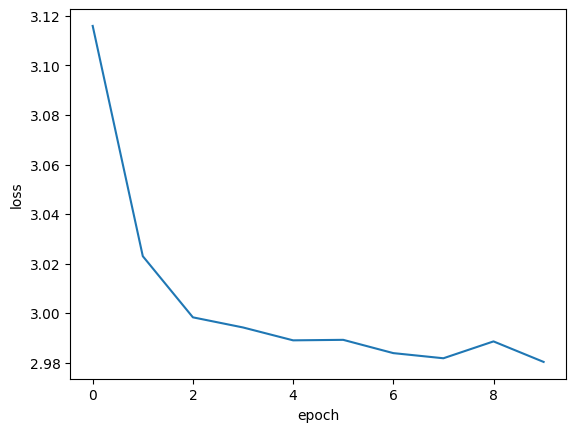

In [69]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()